## Подготовка import

In [14]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from scipy.cluster.vq import whiten, kmeans2
from pprint import pprint

## Создаем функция для обращения к api матчей

In [21]:
def call_api(uri, result_key):
    json = {}
    json = requests.get(uri, headers = { 'X-Auth-Token': 'c52b7825851b4357af3e06c1888152f0' }).json()
    return json[result_key]

## Получаем таблицу результатов чемпионата

In [58]:
# Получаем ссылку на таблицу результатов
league_table_link = call_api('http://api.football-data.org/v1/competitions/430', '_links')['leagueTable']['href']
# Получаем у api таблицу результатов
teams_table = call_api(league_table_link, 'standing')

## Составляем список данных для последующей конвертации для pandas

In [75]:
table_for_pd = []
for team in teams_table:
    table_for_pd.append({'name': team['teamName'], 'goals': team['goals'], 'wins': team['wins']})
table_for_pd

[{'goals': 89, 'name': 'FC Bayern München', 'wins': 25},
 {'goals': 66, 'name': 'Red Bull Leipzig', 'wins': 20},
 {'goals': 72, 'name': 'Borussia Dortmund', 'wins': 18},
 {'goals': 64, 'name': 'TSG 1899 Hoffenheim', 'wins': 16},
 {'goals': 51, 'name': '1. FC Köln', 'wins': 12},
 {'goals': 43, 'name': 'Hertha BSC', 'wins': 15},
 {'goals': 42, 'name': 'SC Freiburg', 'wins': 14},
 {'goals': 61, 'name': 'Werder Bremen', 'wins': 13},
 {'goals': 45, 'name': 'Bor. Mönchengladbach', 'wins': 12},
 {'goals': 45, 'name': 'FC Schalke 04', 'wins': 11},
 {'goals': 36, 'name': 'Eintracht Frankfurt', 'wins': 11},
 {'goals': 53, 'name': 'Bayer Leverkusen', 'wins': 11},
 {'goals': 35, 'name': 'FC Augsburg', 'wins': 9},
 {'goals': 33, 'name': 'Hamburger SV', 'wins': 10},
 {'goals': 44, 'name': '1. FSV Mainz 05', 'wins': 10},
 {'goals': 34, 'name': 'VfL Wolfsburg', 'wins': 10},
 {'goals': 36, 'name': 'FC Ingolstadt 04', 'wins': 8},
 {'goals': 28, 'name': 'SV Darmstadt 98', 'wins': 7}]

## Создаем таблицу pandas

In [76]:
teams_pd = pd.DataFrame(table_for_pd)
teams_pd

,goals,name,wins
0,89,FC Bayern München,25
1,66,Red Bull Leipzig,20
2,72,Borussia Dortmund,18
3,64,TSG 1899 Hoffenheim,16
4,51,1. FC Köln,12
5,43,Hertha BSC,15
6,42,SC Freiburg,14
7,61,Werder Bremen,13
8,45,Bor. Mönchengladbach,12
9,45,FC Schalke 04,11


## Строим график по количеству голов и побед

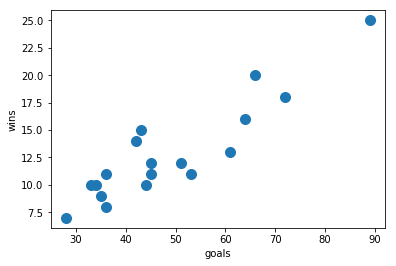

In [78]:
teams_pd.plot.scatter(x='goals', y='wins', s=100)

## Удаляем столбец с названиями команд и проводим нормализацию данных

In [79]:
del teams_pd['name']
teams_pd

,goals,wins
0,89,25
1,66,20
2,72,18
3,64,16
4,51,12
5,43,15
6,42,14
7,61,13
8,45,12
9,45,11


In [80]:
normalized = whiten(teams_pd.as_matrix())
normalized

array([[ 5.69012464,  5.67126778],
       [ 4.21964299,  4.53701423],
       [ 4.6032469 ,  4.0833128 ],
       [ 4.09177502,  3.62961138],
       [ 3.26063322,  2.72220854],
       [ 2.74916134,  3.40276067],
       [ 2.68522736,  3.17590996],
       [ 3.89997307,  2.94905925],
       [ 2.87702931,  2.72220854],
       [ 2.87702931,  2.49535782],
       [ 2.30162345,  2.49535782],
       [ 3.38850119,  2.49535782],
       [ 2.23768947,  2.0416564 ],
       [ 2.1098215 ,  2.26850711],
       [ 2.81309533,  2.26850711],
       [ 2.17375548,  2.26850711],
       [ 2.30162345,  1.81480569],
       [ 1.79015157,  1.58795498]])

## Создаем кластеры и задаем цвета

In [82]:
centroids, cluster_map = kmeans2(normalized, 3)

In [83]:
colors_map = {0: 'r', 1: 'g', 2: 'y'}
colors = [colors_map[col] for col in cluster_map]

## Создаем точечный график

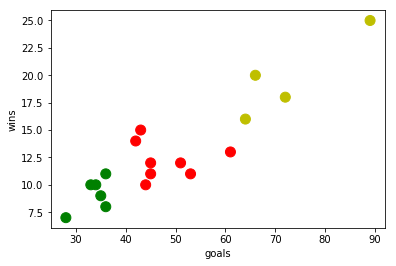

In [88]:
teams_pd.plot.scatter(x='goals', y='wins', c=colors, s=100)